In [17]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from IPython.display import display, Math

# Nuclear Energy Physics solutions (sets-4,5,6), copyright Mateusz Kmieć 

# SET 4

## Problem 4.1

#### Absorption of neutrons in the fuel, U-235 + U-238, leads in some cases to fission which gives new fast neutrons.

$\textbf{Derive}$ the formula for $\eta$, the effective number of fission neutrons per one neutron absorbed in fuel.

(1) $$\eta=\nu_{235}\frac{e\sigma_{f235}}{e\left(\sigma_{f}+\sigma_{c}\right)_{235}+(1-e)\sigma_{a238}}.$$

the enrichment $e$,

(2) $$e=\frac{N_{235}}{N_{235}+N_{238}}.$$

$\textbf{Deriviation}$ of formula (1) (so called thermal fission factor).

First, let us make an assumption that the chain reaction is occuring in an infinitely large system.
This assumption results in no neutron leakage, which indicates that the effective probability of chain reaction is governed only by the respective capture and fission cross-sections.

By definition thermal fission factor can be interpreted as:

(3) $$\eta=\frac{\text{number of fast neutrons produced in thermal fission}}{\text{number of thermal neutrons absorbed in fuel}}.$$

According to Chapter.9 of the book, written by WG, which shall not be named here, fission caused by thermal neutrons occurs only for $U^{235}$ nuclei in $U^{235}$+$U^{238}$ fuel. 

Consequently, thermal fission factor can be expressed as:
    
(4) $$\eta=\nu_{235}\frac{\text{number of thermal neutrons that fissioned}}{\text{number of thermal neutrons absorbed in fuel}},$$

where $\nu_{235}$ denotes the number of neutrons produced per fisson of $U^{235}$ nuclei.

In the light of the aforementioned definitions, the number of thermal neutrons that fissioned can be expressed as a product of the uranium enrichement ($e$) and the cross-section for $U^{235}$ fission at $0.0253$ eV ($\sigma_{f235}$). 

As far as the denominator of (4) is concerned it can be written as $e\left(\sigma_{f}+\sigma_{c}\right)_{235}+\left(1-e\right)\sigma_{a238}$. At this point it is worth noting that $\sigma_{a238}\approx\sigma_{c238}$ as fission for thermal neutrons is negligible for $U^{238}$.

Having found the number of thermal neutrons that fissioned and the number of thermal neutrons absorbed in fuel we can finally obtain equation (1) from equation (4).

$\textbf{QED}$

a). $\textbf{Study}$ how the fission factor depends on the enrichement and determine the value at an erichment of $0.7$, $1$, $2$ ,$3\%$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

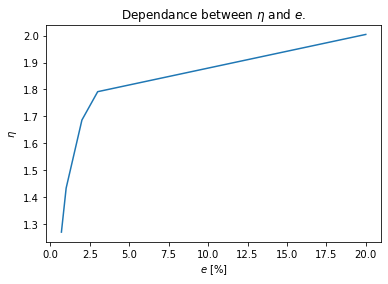

In [132]:
nu235=2.42                              #information fount in chapter.9
e=np.array([0.7,1.0,2.0,3,20])             #enrichment in percent


sigmaf235=539                           #cross section U-235 capture chapter 9
sigmac235=101                           #cross-section U-235 capture chapter 9
sigmac238=2.72                          #cross-section U-238 capture chapter 9

#eta calculated for 0.7, 1, 2 and 3% enrichment
eta=nu235*((e*sigmaf235)/(e*(sigmaf235+sigmac235)+(100-e)*sigmac238))

display(Math(r"\text{Chain reaction is established for } \ \eta \ \text{equal:}"))
for i in range(5):
    display(Math(r'\\ \eta= {:.2f}; \ \ e={:.2f}\%,'.format(eta[i],e[i])))
    
display(Math(r"\text{where we assume no leakage. The result is in accordance with the result from chapter 9!}"))

plt.plot(e,eta)
plt.title("Dependance between $\eta$ and $e$.")
plt.xlabel("$e$ [%]")
plt.ylabel("$\eta$")
plt.show()

b). $\textbf{Calculate}$ the value of the fission factor, for highly enriched uranium and plutonium fissioned by thermal and fast neutrons.

Uranium with a content of U-235 larger or equal to $20\%$ is called highly enriched uranium. That is why from now on I will be using $e=20\%$.

(5) $$\eta=\frac{e\nu_{235}\sigma_{ff235}+(1-e)\nu_{238}\sigma_{ff238}}{e\left(\sigma_{ff}+\sigma_{c}\right)_{235}+(1-e)(\sigma_{c238}+\sigma_{ff238})}.$$

Data taken from

https://www.nuclear-power.net/nuclear-power/reactor-physics/nuclear-fission-chain-reaction/fast-fission-factor/#:~:text=The%20fast%20fission%20factor%20is,neutrons%20produced%20in%20thermal%20fission.&text=This%20arrangement%20increases%20the%20probability,be%20with%20a%20fuel%20nucleus.

In [149]:
e=20

nu235=2.63                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff235=1.3                          #fast cross section U-235 capture chapter 9

sigmac238=0.07
sigmac235=0.09

#epsilon calculated for 20% enrichment
eta=((e*nu235*sigmaff235)+(100-e)*nu238*sigmaff238)/(e*(sigmaff235+sigmac235)+(100-e)*(sigmac238+sigmaff238))

print("eta for 20% enriched U-235 {:.4g}.".format(eta))

eta for 20% enriched U-235 2.373.


In [152]:
e=20 

nu239=3.16                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff239=1.3                          #fast cross section U-235 capture chapter 9

sigmac238=0.07
sigmac239=0.05

#epsilon calculated for 20% enrichment
eta=((e*nu239*sigmaff239)+(100-e)*nu238*sigmaff238)/(e*(sigmaff239+sigmac239)+(100-e)*(sigmac238+sigmaff238))

print("eta for 20% enriched Pu-239 {:.4g}.".format(eta))

eta for 20% enriched Pu-239 2.568.


Fission factor for fast neutrons:

(5) $$\epsilon=\frac{\text{number of fast neutrons produced by fissions of all energies}}{\text{number of fast neutrons produced in thermal fission}}.$$

(6) $$\epsilon=\frac{(e\nu_{235}\sigma_{f235}+e\sigma_{ff235}+(1-e)\nu_{238}\sigma_{ff238})}{e\nu_{235}\sigma_{f235}}$$



In [133]:
#Neutrons produced by fission in U have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu235=2.63                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff235=1.3                          #fast cross section U-235 capture chapter 9
sigmaf235=539                           #fission cross section U-235 capture chapter 9


#epsilon calculated for 20% enrichment
epsilon=(e*nu235*(sigmaf235+sigmaff235)+(100-e)*nu238*sigmaff238)/(e*nu235*sigmaf235)

display(Math(r'\\ \epsilon= {:.2f}; \ \ e={:.2f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

We can repeat this calculation for plutonium.

In [135]:
#Neutrons produced by fission in Pu have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu239=3.16                              #information from nuclear-power.net
nu238=2.60                              #information from nuclear-power.net 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff239=1.93                         #fast cross section Pu-239 capture chapter 9
sigmaf239=747                           #fission cross section Pu-239 capture chapter 9

#epsilon calculated for 20% enrichment
epsilon=(e*nu239*(sigmaf239+sigmaff239)+(100-e)*nu238*sigmaff238)/(e*nu239*sigmaf239)

display(Math(r'\\ \epsilon= {:.2f}; \ \ e={:.2f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

## Problem 4.3

The fuel for a certain breeder reactor consists of pellets composed of mixed oxides, $UO_{2}$ and
$PuO_{2}$ , with the $PuO_{2}$ comprising approximately 30 w/o of the mixture. The uranium is
essentially all U-238, whereas the plutonium contains the following isotopes: Pu-239 (70.5 w/o),
Pu-240 (21.3 w/o), Pu-241 (5.5 w/o), and Pu-242 (2.7 w/o). The pellet density is about 10.6 g/cm 3 .
Calculate $\sigma_{a}$ a and  $\sigma_{f}$ (at 0.0253 eV) for these fuel pellets
.

Macroscopic cross-section, $\sigma$, is the probability that a particular type of interaction will occur per unit path length.

(7) $$\Sigma=\sum_{i}N_{i}\sigma_{i}.$$

Consequently, we can express $\sum_{a}$ and $\sum_{f}$ as:

(8) $$\Sigma_{a}=\sum_{i}N_{i}\sigma_{a i}$$

(9) $$\Sigma_{f}=\sum_{i}N_{i}\sigma_{f i}$$

Number of nuclei per unit volume (atomic number density) can be expressed as: 

(10) $$N_{i}=\frac{\rho_{i}N_{A}}{M_{i}}.$$

In [89]:
#Some useful data (taken directly from an appendix to problem 3)

#Fuel decomposition
wP02=0.3
wU02=0.7

#Plutonium decomposition
wPu239=0.705
wPu240=0.213
wPu241=0.055
wPu242=0.027

wPu=np.array([wPu239,wPu240, wPu241, wPu242])

#Oxygen cross sections
sigmaOa=0.00027
sigmaOf=0

#Uranium cross sections
sigmaU238a=2.73
sigmaU238f=0

#Plutonium absorbtion
sigmaPu239a=1020
sigmaPu240a=289.5
sigmaPu241a=1378
sigmaPu242a=10.3

sigmaPua=np.array([sigmaPu239a, sigmaPu240a, sigmaPu241a, sigmaPu242a])

#Plutonium fission
sigmaPu239f=749
sigmaPu240f=0.064
sigmaPu241f=1015
sigmaPu242f=0

sigmaPuf=np.array([sigmaPu239f, sigmaPu240f, sigmaPu241f, sigmaPu242f])

#molar mass O
MO=15.9994

#molar mass U-238
MU238=238.0507884

#Plutonium masses
MPu239=239.0521636
MPu240=240.0538238
MPu241=241.0568517
MPu242=242.0587428

MPu=np.array([MPu239,MPu240,MPu241,MPu242])

#NA avogadro number
NA=6.02214076*pow(10,23)

#fuel density
rho=10.6 

In [110]:
Mppu=np.dot(wPu,MPu)#calculate weighted plutonium mass

#Now let us calculate the value of the macroscopic cross section from (8)
Sigma_a2=rho*NA*((wU02/(MU238+2*MO))*(sigmaU238a+2*sigmaOa)+(wP02/(Mppu+2*MO))*(np.dot(wPu,sigmaPua)+2*sigmaOa))


#Now let us calculate the value of the macroscopic cross section from (9)
Sigma_f2=rho*NA*((wU02/(MU238+2*MO))*(sigmaU238f+2*sigmaOf)+(wP02/(Mppu+2*MO))*(np.dot(wPu,sigmaPuf)+2*sigmaOf))

display(Math(r'\\ \Sigma_a= {:.4f}  [1/cm],'.format(Sigma_a2*pow(10,-24))))
display(Math(r'\\ \Sigma_f= {:.4f}  [1/cm],'.format(Sigma_f2*pow(10,-24))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# SET 5

In [88]:
np.dot([2,2,4],[1,1,1])

8

# Set 6

## Problem 6.1

#### Identify and explain the differences between fission and fusion energy. Can fission and fusion work together? Why fusion may need fission?

source: https://en.wikipedia.org/wiki/Nuclear_fission

$\textbf{Fission}$ is a process in which the nucleus of an atom splits into two or more smaller nuclei.

source: lecture 9

$\textbf{Fusion}$ - the controlled process in
which two light atoms are fused
together generating a heavier atom
with the aim of generating energy

Let us now have a look at one of the most often considered fusion reactions:
$$^{2}_{1}D+^{3}_{1}T\rightarrow ^{4}_{2}He+^{1}_{0}n+17.56MeV.$$

reference: https://www.iter.org

According to ITER "propaganda-filled" official webpage: "Fusing atoms together in a controlled way releases nearly four million times more energy than a chemical reaction such as the burning of coal, oil or gas and four times as much as nuclear fission reactions (at equal mass)." 

It turns out that 1 kg of a Deuterium/Tritium mixture could be potentially used to generate power. According to the lecture it can generate power of $4GW$ per 24 hours.

Unfortunately, whereas Deuterium is abundant in nature, when it comes to Tritium, it is euphemistically speaking as rare as hen's teeth. The current known natural supply of tritium is estimated at twenty kilos, and thus Tritium must be artificially produced.

The way in which Tritium can be produced was described in lecture 9 slaid 15 (Lithium fission). Namely, Tritium can be bread from Lithium:

$$^{6}_{3}Li+^{1}_{0}n\rightarrow ^{4}_{2}He+^{3}_{1}T+4.8MeV,$$ (egzothermic)

$$^{7}_{3}Li+^{1}_{0}n\rightarrow ^{4}_{2}He+^{3}_{1}T+^{1}_{0}n-2.5MeV.$$ (endothermic)

Even though, the neutrons released in fusion reaction can be used for Tritium production in the aforementioned reactions, there is huge obstacle to overcome. To maintain the Tritium production from Lithium fission in a fusion reactor one has to utilize neutrons with $100\%$ efficiency, which is impossible (see lecture slide 15).

The availability of Lithium on land is sufficient for at least 1000 if not 30000
years, and the cost per kWh would be even smaller than that of Deuterium, which is very good!


The future of fusion reactors such as ITER depend on our ability to develop a successful method of tritium breeding.

Fusion power reactors are extremly expensive, and none of them has produced net energy so far. However, the potential energy gain from deploying fusion instead of fission is so great that there is still plenty of interest in this thechnology and experiments such as ITER have secure funding.

###### (APPENDIX to 6.1 advantages of fusion reactors)

The advantages of fusion reactors are aplenty (cite: https://www.iter.org):

$\textbf{No }CO_{2}$: Fusion doesn't emit harmful toxins like carbon dioxide or other greenhouse gases into the atmosphere. Its major by-product is helium: an inert, non-toxic gas.

$\textbf{No long-lived radioactive waste}$: Nuclear fusion reactors produce no high activity, long-lived nuclear waste. The activation of components in a fusion reactor is low enough for the materials to be recycled or reused within 100 years.

$\textbf{Limited risk of proliferation}$: Fusion doesn't employ fissile materials like uranium and plutonium. (Radioactive tritium is neither a fissile nor a fissionable material.) There are no enriched materials in a fusion reactor like ITER that could be exploited to make nuclear weapons.

$\textbf{No risk of meltdown}$: A Fukushima-type nuclear accident is not possible in a tokamak fusion device. It is difficult enough to reach and maintain the precise conditions necessary for fusion—if any disturbance occurs, the plasma cools within seconds and the reaction stops. The quantity of fuel present in the vessel at any one time is enough for a few seconds only and there is no risk of a chain reaction.

$\textbf{Cost}$:  The power output of the kind of fusion reactor that is envisaged for the second half of this century will be similar to that of a fission reactor, (i.e., between 1 and 1.7 gigawatts). The average cost per kilowatt of electricity is also expected to be similar ... slightly more expensive at the beginning, when the technology is new, and less expensive as economies of scale bring the costs down.

## Problem 6.2

#### Compare the solar (stellar) fusion cycle with the proposed "terrestial" solutions.

$\textbf{reference}$: lecture 9 slide 50.
    
The type of reactions that are considered for energy production are different + different source of confinement
(gravitational, magnetic, inertial).

## Problem 6.3

#### Compare magnetic and inertial confinement fusion concepts. 

cite: Paul Breeze, in Power Generation Technologies (Third Edition), 2019 (https://www.sciencedirect.com/topics/engineering/magnetic-confinement)

While magnetic confinement seeks to create as stable continuous plasma in which fusion can take place, the alternative, inertial confinement, seeks instead to generate energy from a series of discrete fusion reactions producing a burst of energy each time. In an inertial confinement reactor, small capsules containing around 150 mg of a mixture of deuterium and hydrogen are exposed to a massive pulse of energy from multiple lasers. When the laser beams strike the capsule, they create an explosion of X-rays from its surface, and these in turn (by the mechanical principle of action and reaction) create a pressure pulse that heats and compresses the DT mixture with such vigour that the conditions for fusion are generated at its core. One fusion starts, the reaction radiates outwards through the DT mixture faster than the actual molecules can expand and escape (they are ‘confined’ by their inertia) and so the whole charge undergoes fusion and releases a pulse of energy. 

To make this into a means of generating power, these small exploding suns must be created at a relatively rapid rate of perhaps 15 each second. This sounds both exacting and ambitious, but it is exactly what a US programme proposes. To achieve it, the US government has built the National Ignition Facility (NIF), a $5 billion project that is intended to serve both military and civilian research.

NIF is provided with 192 lasers capable of providing a combined pulse of up to 5 MJ of energy, and it has so far produced 2.2 MJ, equivalent to a delivery rate of 500 TW of energy. All the energy contained in the laser beams is focussed onto the 150 mg of DT. NIF is only capable of single shot experiments rather than the continuous operation required for a power plant. Since it started in 2009, it has carried out a series of experiments trying to achieve ignition, the point at which the DT produces more fusion energy than the lasers pump into it. By 2015, it was a factor or two or three short of ignition.

Alongside NIF is the Laser Inertial Fusion Energy (LIFE) project, a collaboration of scientists, technologists, utilities and regulators who are seeking to design a power plant capable of exploiting inertial confinement. Current plants see a demonstration project constructed between 2020 and 2030 and commercial plants available by 2030 or soon afterwards.



Another interesting source:
    
https://science.howstuffworks.com/fusion-reactor3.html
    
$\textbf{Magnetic confinement}$ uses magnetic and electric fields to heat and squeeze the hydrogen plasma. The ITER project in France is using this method.

$\textbf{Inertial confinement}$ uses laser beams or ion beams to squeeze and heat the hydrogen plasma. Scientists are studying this experimental approach at the National Ignition Facility of Lawrence Livermore Laboratory in the United States.

## Problem 6.4

#### Environmental aspects of energy from fusion.

This webpage has a very good description of the environmental aspects of fusion energy production: https://www.iter.org/mach/safety.

You could also just rephrase the Appendix to 6.1.